<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/ML_classification_Matvei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Для выполнения лабрторной работы 2 выбрали датасет mobile.csv, содеражащий данные о продажах смартфонов различных категорий( 0 - низкая цена, 1 - средняя цена, 2 - высокая цена, 3 - очень высокая цена).


Данные представляют из себя таблицы с названиями колонок:
battery_power	– объем аккумулятора (мАч)

blue – наличие поддержки Bluetooth

clock_speed – частота процессора (ГГц)

dual_sim – наличие поддержки двух SIM-карта

fc – количество мегапикселей фронтальной камеры

four_g – наличие поддержки 4G

int_memory – объем внутренней памяти (ГБ)

m_dep – толщина мобильного телефона (см)

mobile_wt –вес мобильного телефона (г)

n_cores – количество ядер процессора

pc – количество мегапикселей основной (задней)камеры

px_height – разрешение экрана по высоте (пиксели)

px_width – разрешение экрана поширине (пиксели)

ram – объем оперативной памяти (МБ)

sc_h – высота экрана (см)

sc_w – ширина экрана (см)

talk_time – максимальноевремяработыотзарядааккумулятораврежимеожидания

three_g – наличие поддержки 3G

touch_screen – наличиесенсорногоэкрана

wifi – наличие поддержки Wi-Fi

price_range – ценовая категория (0 – низкая стоимость, 1 – средняя стоимость, 2 – высокая стоимость, 3 – очень высокая стоимость) – целевой признак



Задача:Классифицировать телефоны по ценам

In [ ]:
# импортируем csv файл
from google.colab import drive
drive.mount('/content/drive/')
sns.set()
dfmobile = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/mobile.csv")
dfmobile

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Анализ данных

In [ ]:
# размер датасета 2000 строк и 21 столбец
dfmobile.shape

(2000, 21)

In [ ]:
# отображаем первые 6 строк нашего датасета

In [ ]:
dfmobile.head(6)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1


Выводим основую информацию о нашем датасете с помощью метода info()

In [ ]:
# как видно пустых значений нет
dfmobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Посмотрим основные статистические параметры с помощью метода describe()

In [ ]:
dfmobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# выводим название стлобцов
dfmobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Предсказывать будем переменную price_range.Узнаем сколько принадлежит строк каждой категории, чтобы узнать равномерно распределены данные илт нет

In [ ]:
# ищем уникальные элементы в столбце price_range
dfmobile['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
# подсчитываем количество строк, принадлежащих [1, 2, 3, 0]
dfmobile['price_range'].value_counts()

# увидели, что данные равномерно распределены

,count
price_range,
1,500
2,500
3,500
0,500


# Визуализация данных

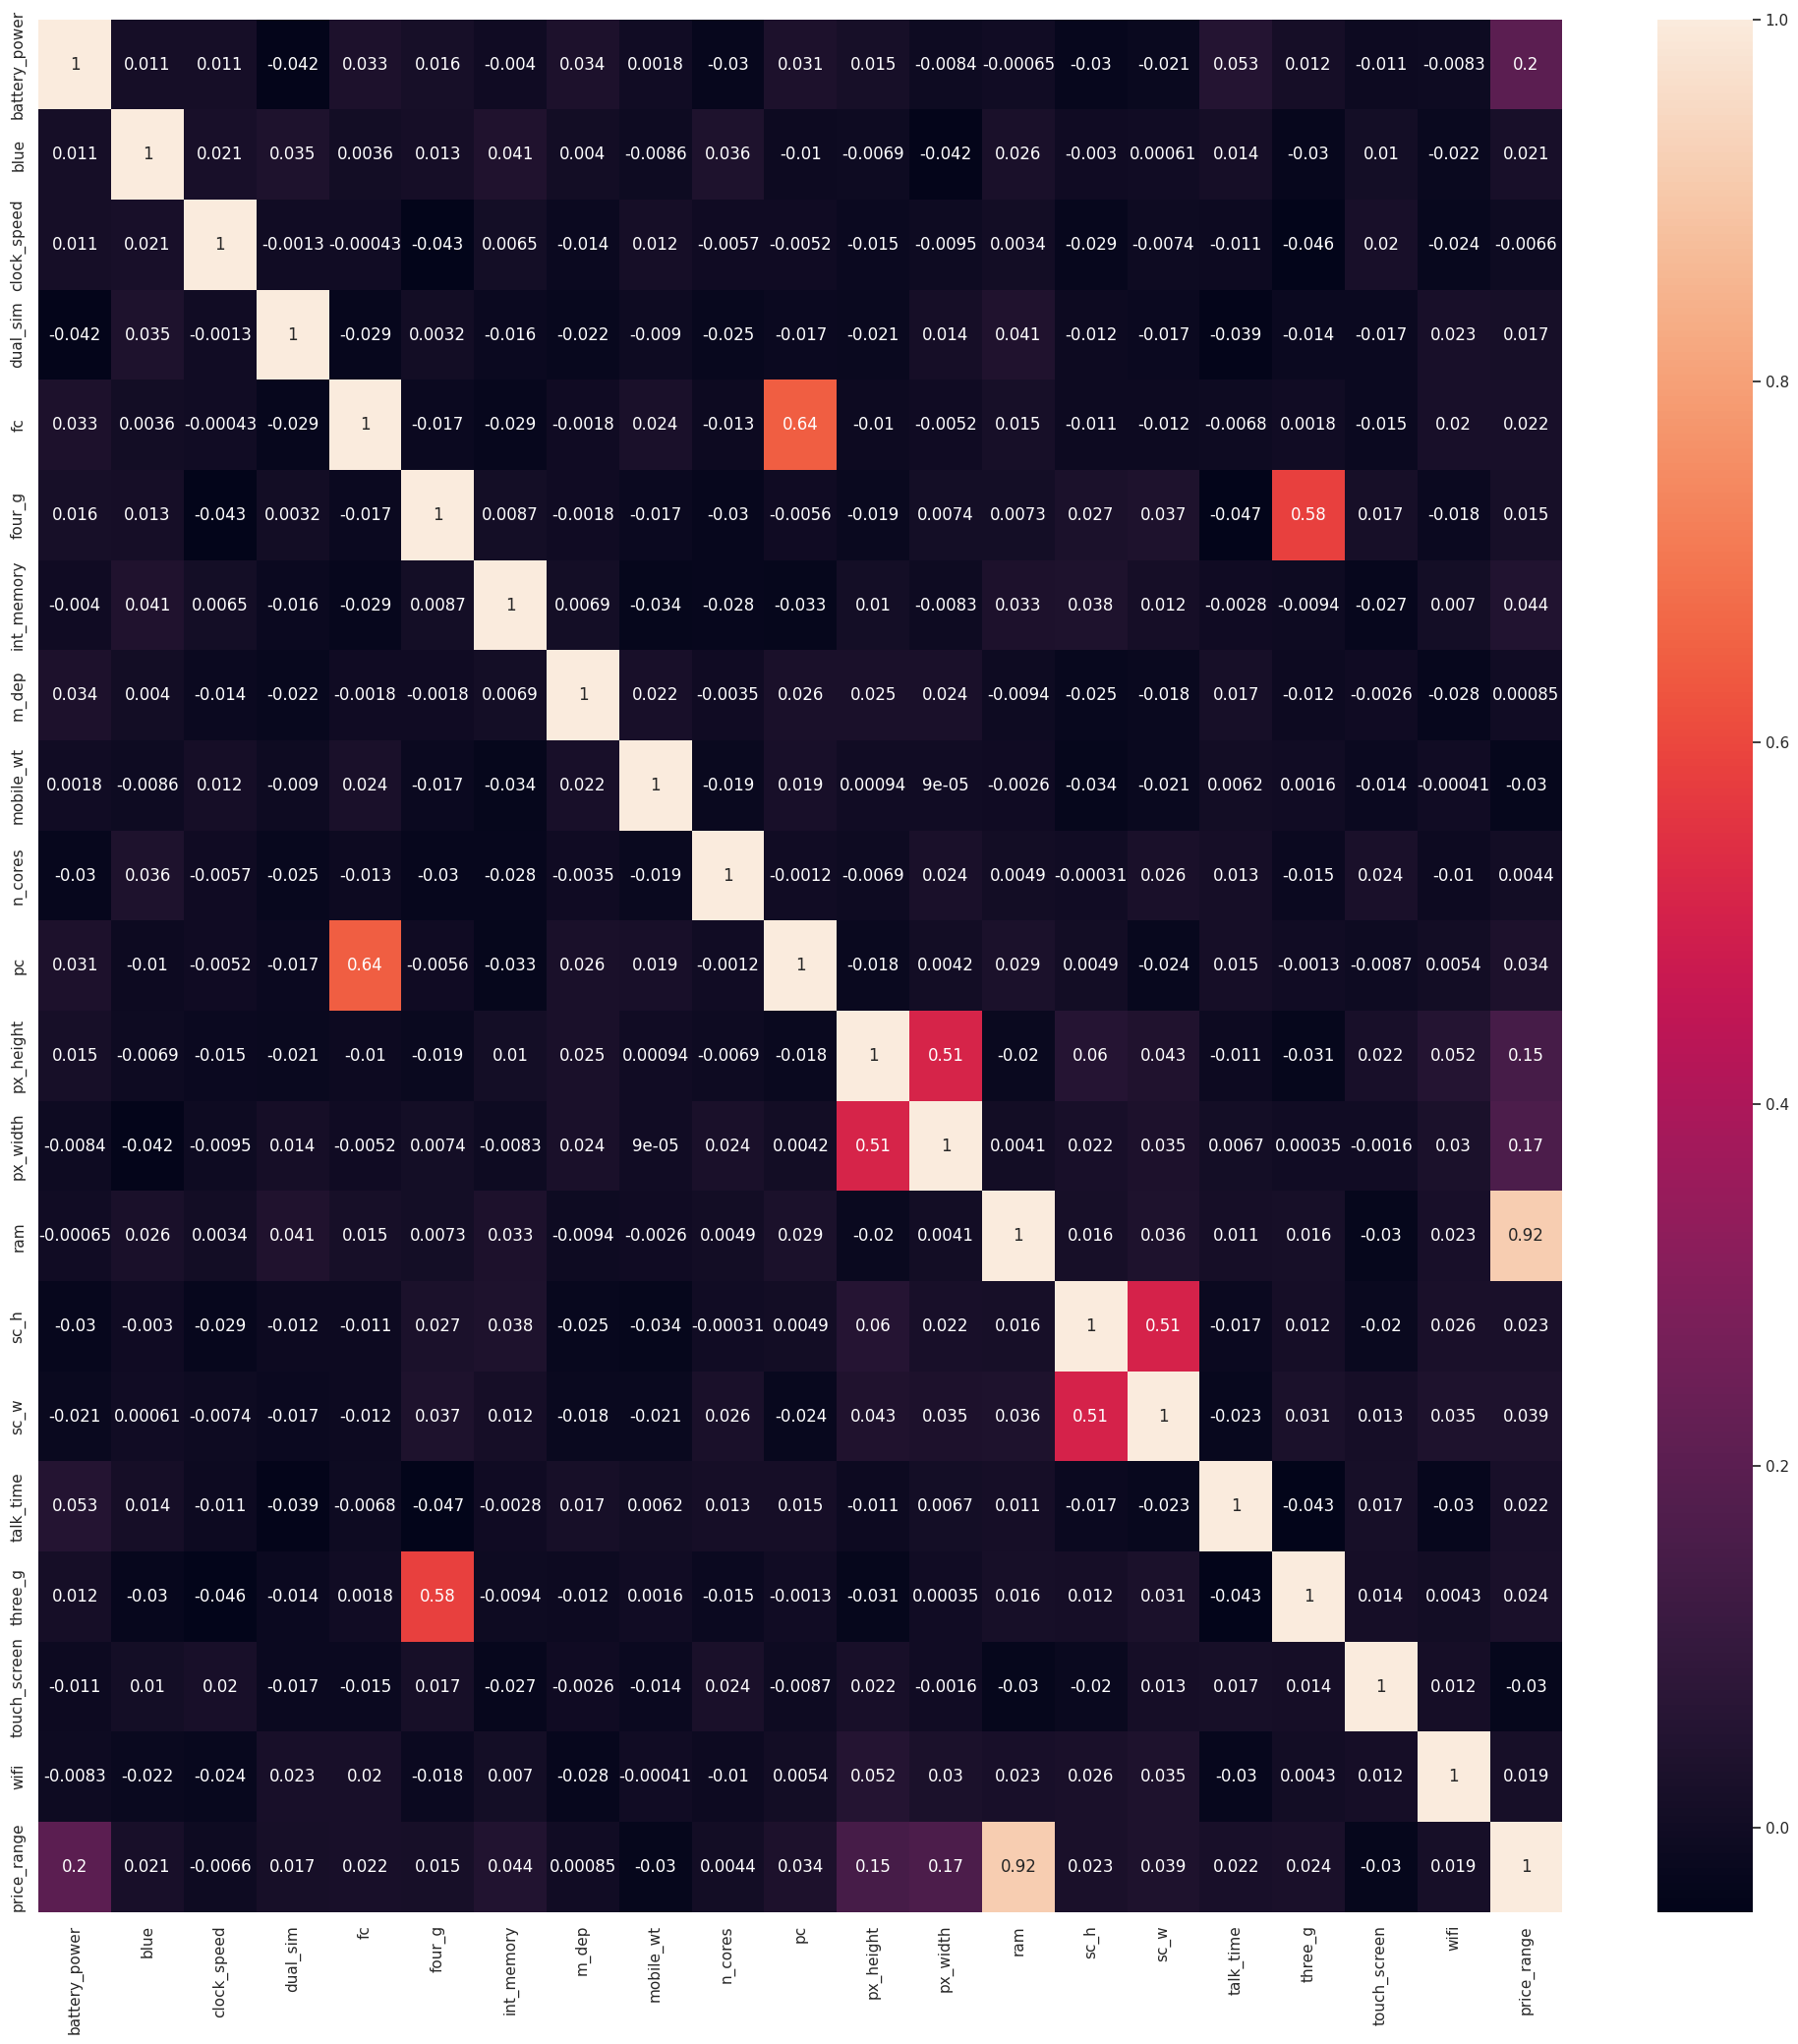

In [ ]:
# Построим тепловую карту
plt.figure(figsize = (25, 25))
sns.heatmap(dfmobile.corr(numeric_only = True), annot = True)
plt.show()

Как видно из тепловой карты большинство параметров полохо коррелируют между собой плохо.Однако есть пареаметры коррелирующий хорошо по сравнению с большинством:

1)fc and pc (0.64)

2)four_g and three_g(0.58)

3)sc_w and sc_h(0.51)

4) price_range and ram (0.92)  

# Построение модели

## Разделение набора данных

y  - пусь это целевая переменная, которую будем предсказывать. Мы ищем зависимость этой переменной от соответствующих признаков.В нашем случай это price_range

В X - это переменная, в которую сложим весь остальной набор данных бех целевой переменной.

In [ ]:
X = dfmobile.drop(['price_range'], axis = 1)
y = dfmobile['price_range']
print(f'X shape : {X.shape}, y shape : {y.shape}')

# X содержит 2000 строк и 20 столбцов, а y 2000 строк и один столбец

X shape : (2000, 20), y shape : (2000,)


## Train и Test разделение

Разделяем исходный набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
import scipy.stats as stats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15, stratify=y)

stats.ttest_ind(a = y_train, b = y_test)

TtestResult(statistic=0.0, pvalue=1.0, df=1998.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [ ]:
# создаём лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оценка качества модели
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.713125 (0.027308)
LDA: 0.946250 (0.017722)
KNN: 0.924375 (0.016406)
CART: 0.821875 (0.035493)
NB: 0.811250 (0.039902)
SVC: 0.293125 (0.010625)


Получили, что самые лучшие оценки точности у k-ближайших соседей(KNN) и линейные дискрименантный анализ(LDA)

Самая худшая - метод опырных векторов(SVC)

Линейные дискрименантный анализ(LDA) показал лучшие метрики среди всех алгоритмов.
Далее работаем с LDA .

Обучим модель LDA на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель LDA
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [ ]:
model_lda = LinearDiscriminantAnalysis(solver='eigen')
model_lda.fit(X_train, y_train)
model_lda_pred = model_lda.predict(X_test)
model_lda_tr = model_lda.transform(X_train)
model_lda_accuracy = accuracy_score(y_test, model_lda_pred)

print(f'sk LDA accuracy: {model_lda_accuracy}')
print(f'sk LDA prediction: {model_lda_pred}')
print('sk transformed features', model_lda_tr[:5].T, sep='\n')




sk LDA accuracy: 0.9375
sk LDA prediction: [1 0 0 2 1 2 0 3 1 1 3 3 1 0 1 0 0 1 3 3 2 2 3 2 1 1 2 1 1 3 3 1 0 0 0 0 2
 0 2 2 3 0 2 0 1 0 1 2 2 0 2 1 0 2 3 3 0 2 1 2 3 0 2 2 1 3 1 3 3 3 0 1 0 2
 1 0 0 0 0 3 1 1 1 2 0 1 3 1 1 1 3 3 3 2 2 1 0 3 1 0 3 3 2 0 2 1 2 2 3 0 2
 0 2 3 3 1 0 0 2 2 0 2 2 1 3 0 2 3 2 1 1 1 2 1 3 3 0 0 2 0 1 3 1 1 3 3 0 3
 2 1 3 2 2 2 2 2 0 3 0 0 1 1 0 1 0 2 0 2 1 1 0 1 1 2 0 2 1 1 3 2 0 1 2 1 3
 0 1 0 3 1 0 2 1 3 3 1 3 0 3 3 3 0 1 1 3 0 2 2 1 3 3 0 0 3 1 3 2 3 1 0 0 0
 3 2 1 2 2 3 2 3 1 2 1 2 1 1 1 2 2 2 2 3 1 2 0 2 1 2 0 2 1 0 1 0 0 1 1 2 1
 0 2 2 3 0 3 3 0 2 3 2 1 3 2 0 0 1 0 1 3 1 0 3 0 0 1 0 3 3 1 0 1 3 1 1 3 0
 3 3 0 1 1 0 2 1 3 0 1 2 2 2 2 2 1 3 1 2 3 3 1 1 0 3 0 0 3 3 2 0 3 2 0 2 1
 2 1 1 1 0 2 3 2 3 2 1 3 3 2 1 0 0 1 3 2 0 2 1 3 3 1 0 3 2 1 2 1 0 0 1 1 0
 0 2 1 2 3 1 0 1 3 3 2 3 2 2 2 0 2 0 0 3 1 3 2 1 1 2 0 2 1 0]
sk transformed features
[[-16.69333614  -8.8363725  -11.12486297 -10.12966443  -8.88572836]
 [ -1.74952752  -2.1783691   -0.55239011  -1.12150959

Трансформация данных с помощью метода transform проводится для изменения пространства данных таким образом, чтобы важные признаки стали более различимыми для модели машинного обучения. Это может помочь улучшить производительность модели или упростить задачу для классификации или регрессии.

## Визуализация решения

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


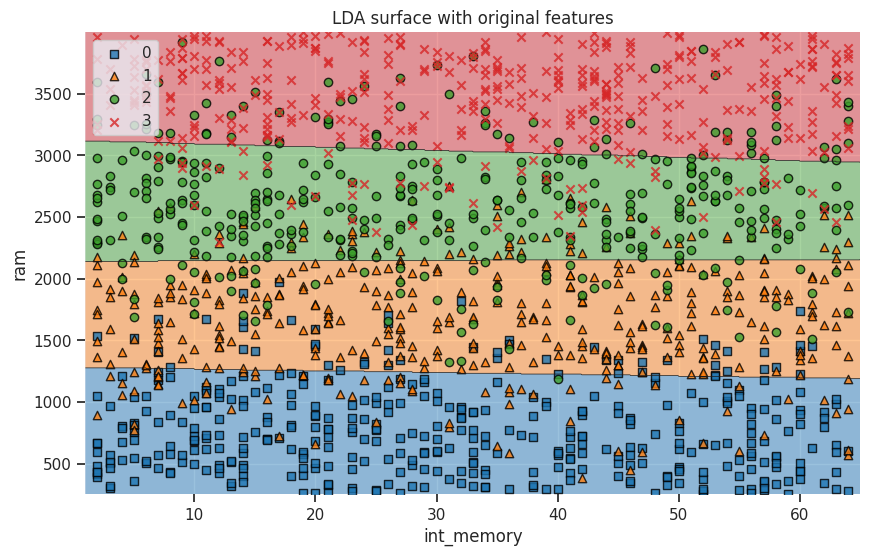

In [ ]:
from mlxtend.plotting import plot_decision_regions
# Зависимость объема внутренней памяти от объёма оперативной памяти

# Подготовка данных для 2D визуализации
X_2d = X_train[['int_memory', 'ram']].values
y_2d = y_train.values

# Обучение LDA на 2D данных
model_lda1 = LinearDiscriminantAnalysis(solver='eigen')
model_lda1.fit(X_2d, y_2d)

# Визуализация решения
plt.figure(figsize=(10, 6))
plt.title('LDA surface with original features')
plot_decision_regions(
        X = X_2d,
        y = y_2d,
        clf = model_lda1)

plt.xlabel('int_memory')
plt.ylabel('ram')
plt.legend(loc='upper left')
plt.show()


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


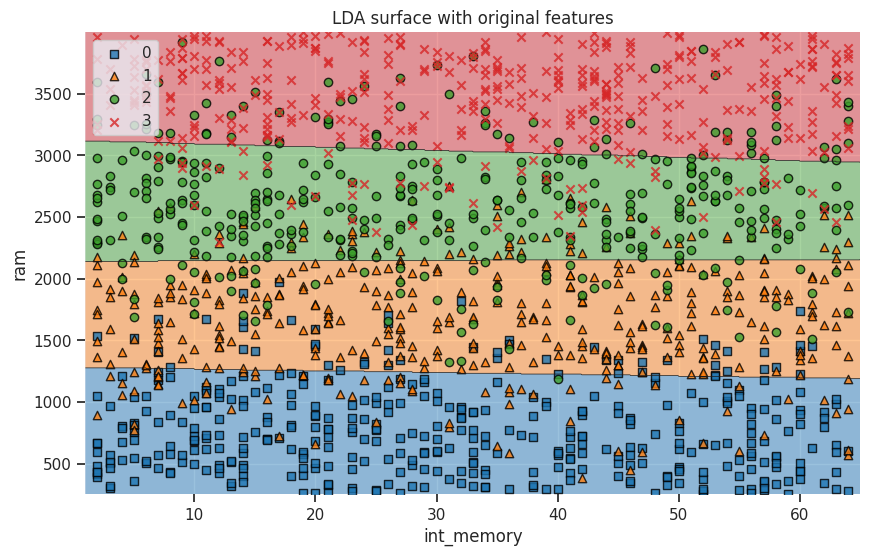

In [ ]:
from mlxtend.plotting import plot_decision_regions
"""
Зависимость максимального время работы от
заряда аккумулятора в режиме ожидания от объёма оперативной памяти
"""

# Подготовка данных для 2D визуализации
X_2d = X_train[['int_memory', 'ram']].values
y_2d = y_train.values

# Обучение LDA на 2D данных
model_lda1 = LinearDiscriminantAnalysis(solver='eigen')
model_lda1.fit(X_2d, y_2d)

# Визуализация решения
plt.figure(figsize=(10, 6))
plt.title('LDA surface with original features')
plot_decision_regions(
        X = X_2d,
        y = y_2d,
        clf = model_lda1)

plt.xlabel('int_memory')
plt.ylabel('ram')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'LDA surface with transformed features'}>

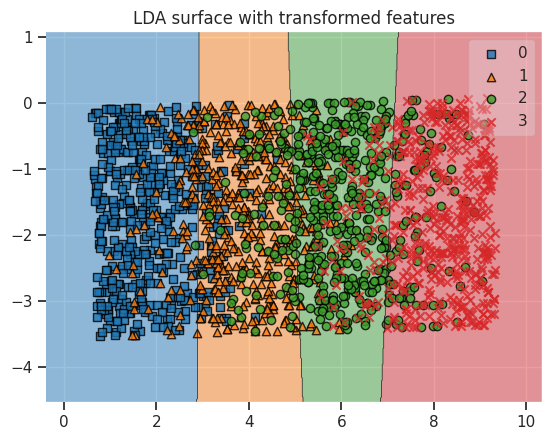

In [ ]:
"""df = dfmobile['price_range']
Xs = dfmobile[['int_memory', 'ram']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X = X1_lda, y = ys, clf = sk_lda2)"""

df = dfmobile['price_range']
Xs = dfmobile[['int_memory', 'ram']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(Xs, ys).transform(Xs)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)



In [ ]:
predicted = sk_lda2.predict(X1_lda_test)


In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))



Recall (all 1s predicted right): 0.78
Precision (confidence when predicting a 1): 0.77
Detail:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       124
           1       0.68      0.66      0.67       110
           2       0.70      0.62      0.66       125
           3       0.83      0.91      0.86       141

    accuracy                           0.78       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.78      0.77       500

